# ML for Econ Analysis Project 1 - Peru
name here
## 1 Problem Description
blablablabla


In [1]:
# Import everything
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import normal as rnorm

# for plot
import seaborn as sns
#stata-like output
import statsmodels.api as sm
import statsmodels.formula.api as smf

#for missing values
import missingno as msno

In [2]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network
 
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


In [3]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# 2 Data Preprocessing
to check the missing value of data, visulize the data to get a "feel", and normalize the data

## 2.1 Dataset acquisition
we use pd.read_csv to read the csv file as dataframe data type.

In [4]:
# Peru data
peru = pd.read_csv('datasets/peru_for_ml_course.csv')
peru.head()
# Overview of all variables
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

## 2.2 Cleaning the Data
We check our dataset by detecting whether it contains null, Nan values or missing values.

In [5]:
peru.isnull().sum()

lnpercapitaconsumption    23152
d_fuel_other                  0
d_fuel_wood                   0
d_fuel_coal                   0
d_fuel_kerosene               0
                          ...  
h_hhsize                      0
id_for_matlab                 0
hhid                          0
lncaphat_OLS                927
percapitahat_OLS            927
Length: 81, dtype: int64

In [6]:
columnNames = peru.columns.values.tolist()
columnNames[2]

'd_fuel_wood'

In [7]:
peru.loc[25:26,columnNames[22:30]]

,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

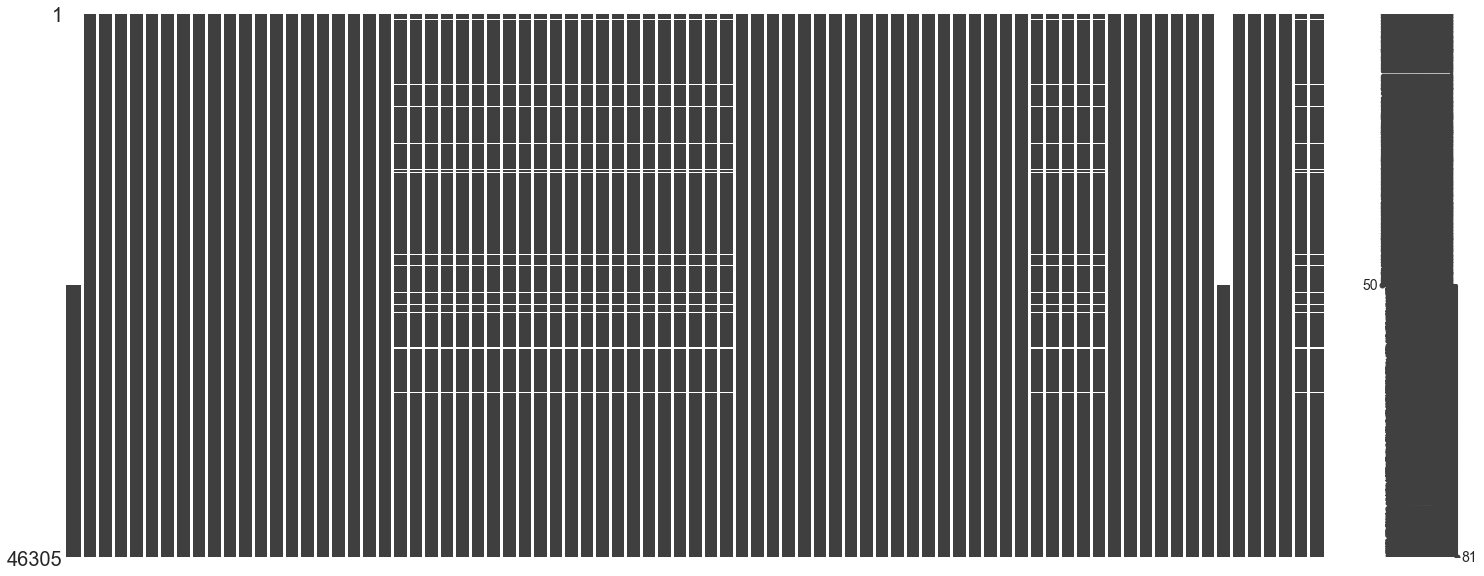

In [8]:
# Visualize no missing values
msno.matrix(peru)

In [9]:
# Visualize the distribution of each feature to get an overview of the dataset.
peru.describe(include='all')

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,23153.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,...,46305.000000,46305.000000,46305.000000,23153.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.853638,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,...,0.043797,0.036389,0.500011,459.015591,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.742314,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,...,0.204644,0.187258,0.500005,401.571900,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660061
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.250000,0.000000,1.000000,1.000000,1.010110e+05,4.434424,-57.498260
25%,5.344018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,209.352100,0.000000,2.000000,11577.000000,9.080021e+07,5.332906,235.941375
50%,5.877269,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,356.833300,0.000000,4.000000,23153.000000,1.828055e+08,5.871004,404.708750
75%,6.354380,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,575.005700,1.000000,5.000000,34729.000000,2.814050e+08,6.306364,611.242975
max,8.858051,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,7030.769000,1.000000,20.000000,46305.000000,4.035098e+08,7.738163,2132.654000


## 2.3 Split Train-test dataset

In [17]:
trainNaN = peru[peru['training']==1]
# train = trainNaN.dropna()
train=trainNaN.dropna(axis=0, how='any', inplace=False)
# train.isnull().sum().sum()

# train.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

train.to_csv(r'E:\ML for EconAna\Peru\train_py.csv',index=True ,header=True)


In [18]:
test = peru[peru['training']==0]
test.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,0,1,1,233710511,5.246471,284.4243
1,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,3,2,295508011,6.129468,522.8840
2,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,4,3,257600211,6.665577,878.4961
3,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,1,9,4,198104311,6.088295,567.4705
4,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,1,8,5,24805311,5.008170,115.4929


In [19]:
x_train = train.iloc[:,1: 73]
x_test = test.iloc[:,1: 73]
x_train.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
23152,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
23153,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
23154,0,1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
23155,0,1,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0
23156,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0


In [20]:
# add constant for train_x
one = np.ones(np.shape(x_train))
x_train_withcons = np.concatenate([one,x_train],axis=1)

In [21]:
y1_train = train.loc[:,'percapitaconsumption']
y2_train = train.loc[:,'lnpercapitaconsumption']
y1_test = test.loc[:,'percapitaconsumption']
y2_test = test.loc[:,'lnpercapitaconsumption']

# 3 Model implementation
## 3.1 Replicate the original paper(Peru): OLS

In [22]:
# linear regression with constant
linreg = LinearRegression()
model1 = linreg.fit(x_train_withcons,y1_train)

In [23]:
model1.coef_

array([-1.48653109e+10, -3.47331850e+14,  2.76293773e+14, -1.75015237e+14,
       -1.15490024e+14,  1.86060136e+14, -2.09364668e+14, -1.14165568e+14,
        3.25156284e+12,  1.39446126e+13, -2.26853316e+13,  3.68504037e+13,
       -2.66969625e+13,  2.53767893e+12,  4.27253248e+13,  4.19187489e+11,
       -2.03428576e+13, -3.02165912e+13,  1.90434963e+13,  1.14927082e+13,
        1.50421521e+13, -3.26799855e+13,  2.96749127e+13,  4.38621557e+13,
       -9.78435828e+12, -8.51755301e+12,  1.58056910e+13,  1.37460133e+13,
        4.69909076e+12, -1.47606210e+13,  4.76201979e+12,  7.89716388e+11,
        1.82684179e+12,  7.29692226e+12, -1.65132700e+13, -1.10440560e+13,
        9.86971052e+12, -5.15479518e+12,  1.14503374e+12,  8.40622132e+11,
        1.05685129e+13,  3.93385817e+13,  6.17356301e+11, -1.32227029e+13,
       -1.80273008e+12, -2.49406533e+13, -1.36638240e+13,  2.75960335e+12,
        1.11581593e+12, -8.74610215e+12,  1.09591579e+12,  3.99497319e+12,
       -2.31916023e+12, -

In [24]:
ols_estimatey = model1.predict(x_train_withcons)
ols_estimatey

array([443.59375, 816.21875, 209.5    , ..., 394.15625, 334.65625,
       765.21875])

In [25]:
x

NameError: name 'x' is not defined

In [26]:
x_train_withcons.shape

(22674, 144)

In [27]:
# Linear regression by using Stata Model
x = sm.add_constant(x_train)
model2=sm.OLS(y1_train,x)
results=model2.fit()
results.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
const,342.5426,15.069,22.731,0.000,313.006,372.079
d_fuel_other,-91.3522,8.314,-10.988,0.000,-107.649,-75.056
d_fuel_wood,-75.4172,7.137,-10.568,0.000,-89.405,-61.429
d_fuel_coal,-25.4179,11.655,-2.181,0.029,-48.262,-2.574
d_fuel_kerosene,-47.9118,25.201,-1.901,0.057,-97.307,1.484
d_fuel_gas,-4.1380,6.505,-0.636,0.525,-16.889,8.613
d_fuel_electric,433.6964,19.726,21.987,0.000,395.033,472.360
d_fuel_none,153.0833,11.093,13.800,0.000,131.341,174.826
d_water_other,39.7076,9.116,4.356,0.000,21.840,57.576
d_water_river,27.2312,5.996,4.542,0.000,15.479,38.983


## x debug

In [28]:
# Table 3.3 (1)
est = sm.OLS.from_formula('percapitaconsumption ~ d_h_educ_pre', train).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,458.4733,2.683,170.906,0.000,453.215,463.731
d_h_educ_pre,-5.6795,152.676,-0.037,0.970,-304.936,293.577


## Calculate MSE

In [29]:
#calculate MSE for the training dataset (from the estimation of original paper)
from sklearn import metrics
metrics.mean_squared_error(train.percapitahat_OLS,train.percapitaconsumption)
metrics.mean_squared_error(train.lncaphat_OLS,train.lnpercapitaconsumption)

0.19146992519582293

In [30]:
#calculate MSE for the training dataset (my calculation)
metrics.mean_squared_error(ols_estimatey,train.percapitaconsumption)

78036.1300404879

## 3.2 Model-KNN
Using the dataset without 'poor'

In [35]:
# import the training dataset
train_py = pd.read_csv('train_py.csv')
train_py.info()
# delete the column of 'poor'
train = train_py.drop(['poor'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22674 entries, 0 to 22673
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22674 non-null  int64  
 1   lnpercapitaconsumption   22674 non-null  float64
 2   d_fuel_other             22674 non-null  int64  
 3   d_fuel_wood              22674 non-null  int64  
 4   d_fuel_coal              22674 non-null  int64  
 5   d_fuel_kerosene          22674 non-null  int64  
 6   d_fuel_gas               22674 non-null  int64  
 7   d_fuel_electric          22674 non-null  int64  
 8   d_fuel_none              22674 non-null  int64  
 9   d_water_other            22674 non-null  int64  
 10  d_water_river            22674 non-null  int64  
 11  d_water_well             22674 non-null  int64  
 12  d_water_truck            22674 non-null  int64  
 13  d_water_pylon            22674 non-null  int64  
 14  d_water_outside       

In [31]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y1_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estim

ValueError: Unknown label type: 'continuous'

In [ ]:
clf_knn.best_params_

In [ ]:
pred=clf_knn.predict(x_test) 
acc_knn=accuracy_score(pred,y1_test)
accuracy_score(pred,y1_test) 

## 3.2 replicate the original figure 5 : OLS estimate